In [93]:
## MP 573 Lecture 8: Intro to Sampling
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio

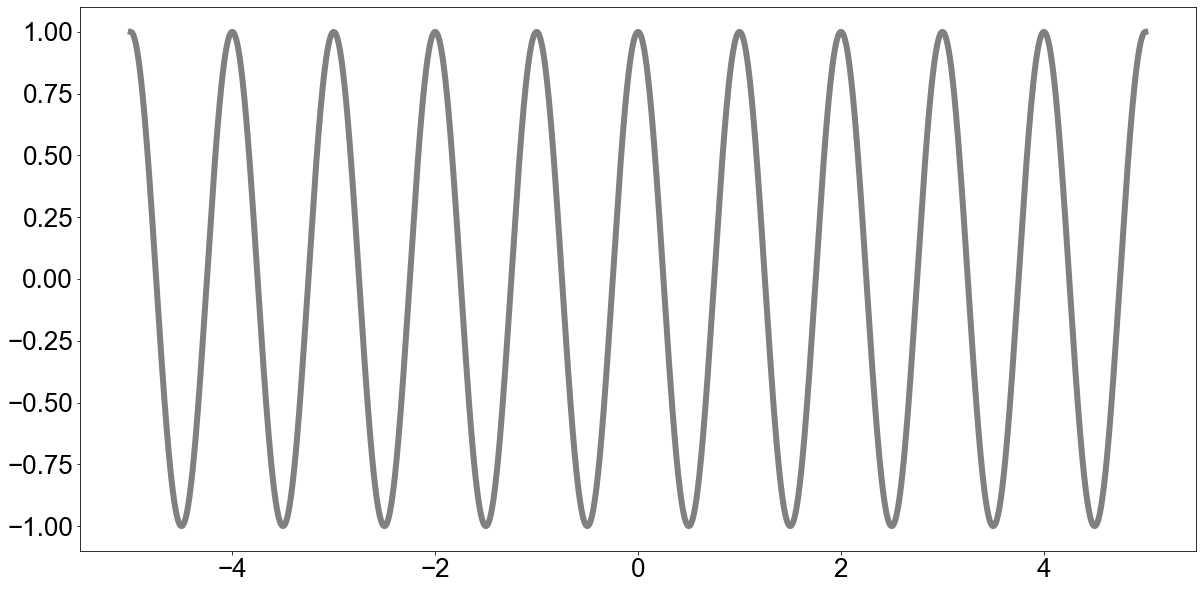

In [88]:
# Simulate some sinusoidal signal, and plot
N = 10001
xmax = 5
x = np.linspace(-xmax,xmax,N)
s = np.cos(2*np.pi*x)
plt.figure(figsize=(20,10))
font = {'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)
plt.plot(x,s,'gray',linewidth=6.0);

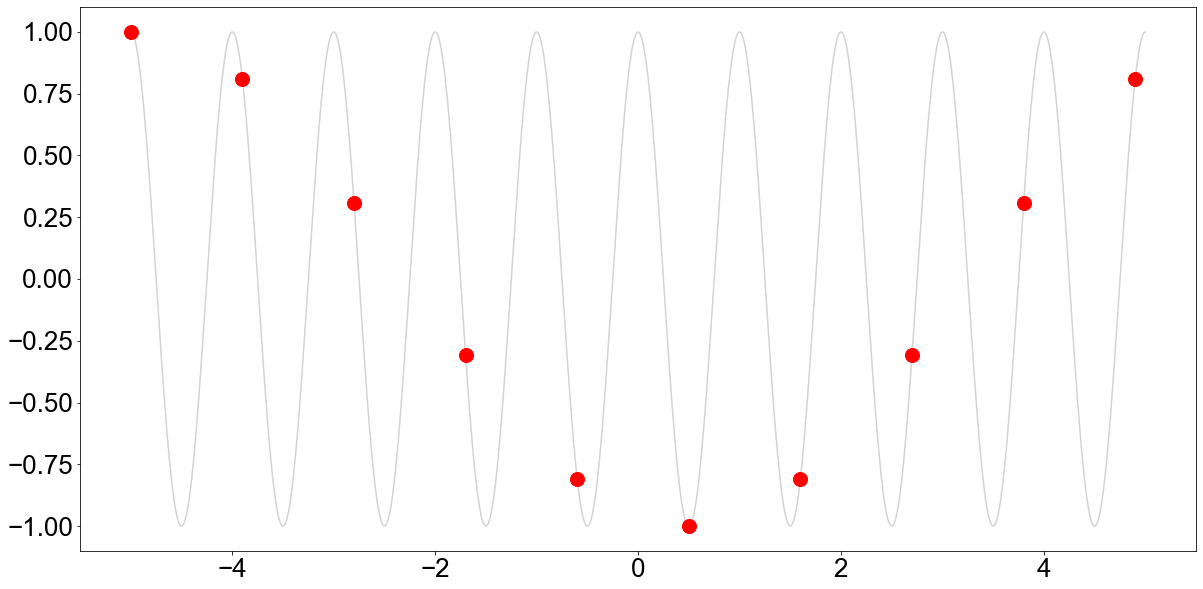

In [91]:
# Sample our signal
dx = 1.1
x2 = np.arange(-xmax,xmax,dx)
s2 = np.cos(2*np.pi*x2)
plt.figure(figsize=(20,10))
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)
plt.plot(x,s,'lightgray')
plt.plot(x2,s2,'ro',markersize=14);

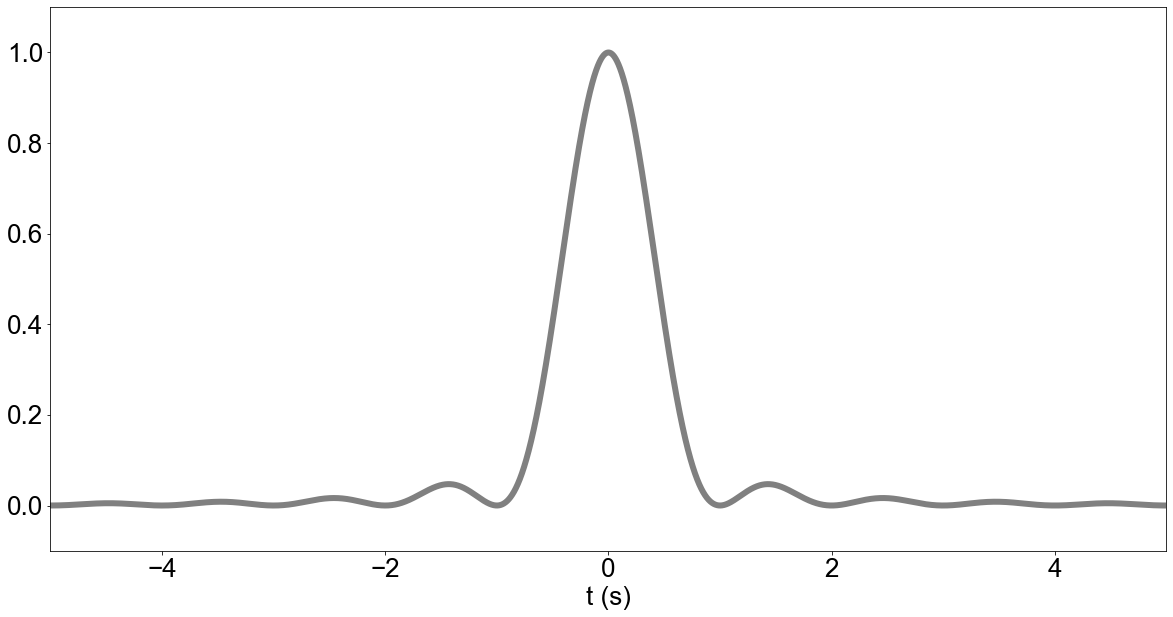

In [92]:
# Now let's create a slightly more complicated signal
# Also, let's make it a function of time (could be space just as well)
N = 100001
tmax = 50
t = np.linspace(-tmax,tmax,N)
s = np.sinc(t)**2
plt.figure(figsize=(20,10))
plt.rc('font', **font)
plt.plot(t,s,'gray',linewidth=6.0)
plt.axis([-5, 5, -0.1, 1.1]);
plt.xlabel('t (s)');

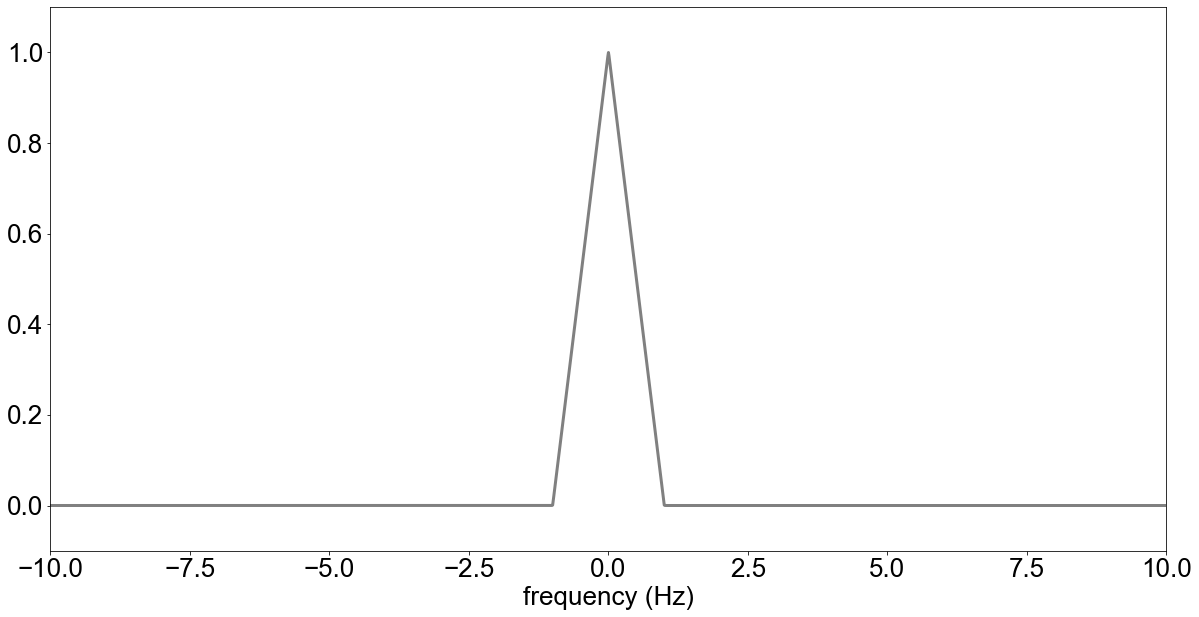

In [94]:
# Now we take (discrete) Fourier transforms
shat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(s)))/np.sqrt(len(s))
shat = shat/np.max(np.abs(shat))
u = np.linspace(0,N-1,N)*1/(2*tmax); u = u-np.mean(u)

# And let's plot the FT
plt.figure(figsize=(20,10))
plt.rc('font', **font)
plt.plot(u,abs(shat),'gray',linewidth=3.0)
plt.axis([-10, 10, -0.1, 1.1]);
plt.xlabel('frequency (Hz)');

(100001,)

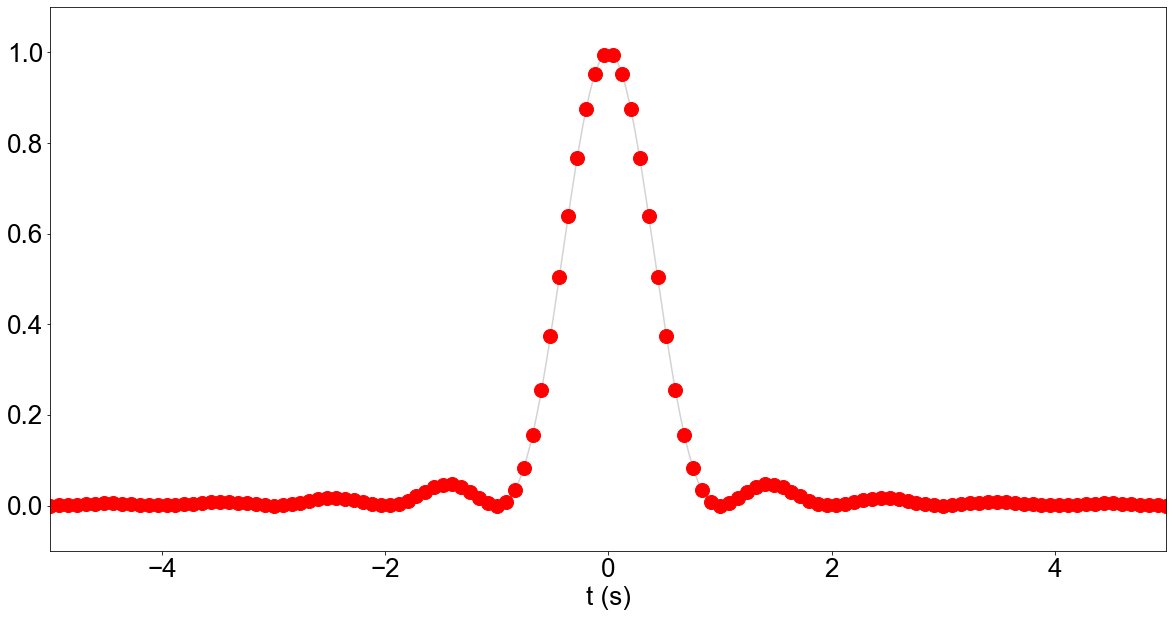

In [104]:
# Now we sample it
dt = 0.08 # This is our sampling interval
skip = int(np.round(dt/(t[1]-t[0])))
t2 = t[int(np.floor(skip/2))::skip]
s2 = 0.0*t.copy()
s2[int(np.floor(skip/2))::skip] = s[int(np.floor(skip/2))::skip]

# And plot
plt.figure(figsize=(20,10))
plt.rc('font', **font)
plt.plot(t,s,'lightgray')
plt.plot(t2,s2[int(np.floor(skip/2))::skip],'ro',markersize=14)
plt.axis([-5, 5, -.1, 1.1]);
plt.xlabel('t (s)');

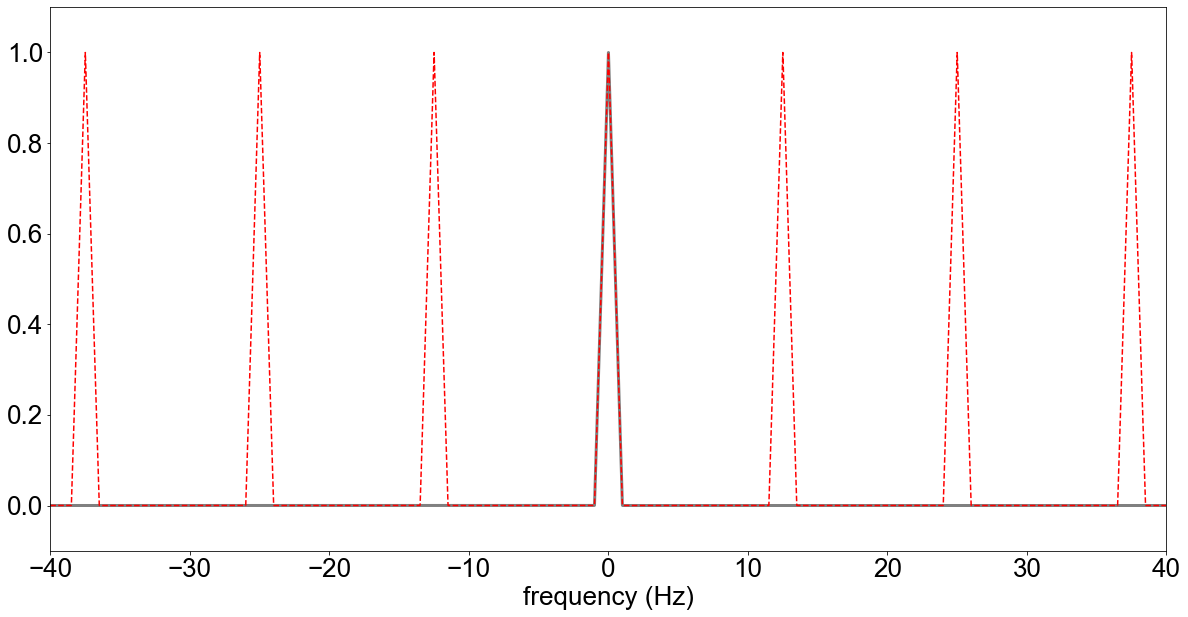

In [105]:
# Now we take (discrete) Fourier transforms
shat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(s)))/np.sqrt(len(s))
shat = shat/np.max(np.abs(shat))
shat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(s2)))/np.sqrt(len(s2))
shat2 = shat2/np.max(np.abs(shat2))
u = np.linspace(0,N-1,N)*1/(2*tmax); u = u-np.mean(u)

# And let's plot the FTs
plt.figure(figsize=(20,10))
plt.rc('font', **font)
plt.plot(u,abs(shat),'gray',linewidth=3.0)
plt.plot(u,abs(shat2),'r--')
plt.axis([-40, 40, -0.1, 1.1]);
plt.xlabel('frequency (Hz)');


## Q1: Nyquist sampling for our signal

Our sinc$^2(t)$ signal above has a bandwidth of 2 Hz (ie: its FT is nonzero only between -1 and 1). What is the Nyquist sampling interval for this signal?

A: 0.1 seconds

B: 0.5 seconds

C: 1.0 seconds

D: 2.0 seconds

## Q2: Sinc-interpolation

For the sampled signal above (ie: sampled version of our sinc$^2(t)$ signal), say we sample (multiply by a train of delta functions) with spacing 1/4 seconds. Then we take the sampled signal and convolve it with sinc$(4t)$ (ie: we perform sinc-interpolation). What will be the resulting signal after this convolution? 

*Hint: think about this convolution in the Fourier domain, and remember our Fourier-domain description of sampling in section 8.4*

A: Zero everywhere

B: It will be bandlimited since the sinc$(4t)$ is a low-pass filter, but that is all we can know

C: It will be our original signal sinc$^2(t)$

### Q3: Nyquist sampling for a rect

Now we have a time-domain signal $f(t) = $rect$(t)$ (ie: a box-shaped signal that is equal to 1 between -0.5 and 0.5 and is zero elsewhere). We would like to sample this signal in time such that we can recover it. What is the Nyquist sampling interval for this signal?

A: 0.01 seconds

B: 0.05 seconds

C: 1.0 seconds

D: There is no Nyquist sampling rate because this signal is not bandlimited (ie: its Fourier transform is not limited to a finite range of frequencies)